# Example: Vertical instability (growth rate) calculations

---

This notebook will demonstrate various different ways to calculate the **growth rates** (or **timescales**) associated with **vertically unstable modes** of an equilibrium. We will explore ways to plot these different quantities and carry out eigenmode reduction.


---

### The deformable growth rate model

Assume we have solved the Grad-Shafranov equation and have obtained an equilibrium. From this we can extract the plasma current density discretised over the spatial domain (these are only non-zero inside the LCFS so we mask points outside the limiter to save memory):

\begin{equation*}
    \bold{I}_y := \bold{I}_y^{GS} (\bold{I}_m, I_p, \bold{\theta}).
    \tag{1}
\end{equation*}

This is a function of the: 
- currents in the metal conductors $\bold{I}_m$ (i.e. the active coils and passive structures).
- plasma current $I_p$.
- free parameters $\bold{\theta}$ used to define the plasma current density profiles (i.e. $J_p(\psi,R,Z)$). 

In order to estimate the instability timescales/growth rates of this plasma, we will need to define (and then linearise) the coupled **circuit** and **plasma** current equations. 

**Circuit equations**: 

These equations govern the flow of current in the active coils and passive structures:

\begin{equation}
    M_{m,m} \bold{\dot{I}}_m + M_{m,y} \bold{\dot{I}}_y + R_{m,m} \bold{I}_m = \bold{V}_m
    \tag{2}
\end{equation}

- $M_{m,m}$ is the symmetric matrix of mutual inductances between all of the metals. 
- $M_{m,y}$ is the matrix of mutual inductances between all of the metals and the discretised plasma current density. 
- $R_{m,m}$ is the diagonal matrix of resistances in the metals.
- $V_m$ is the vector of voltages applied to the metals (note: these are non-zero for the active coils only).
- Note that the dots indicate time derivatives. 

**Plasma equation**: 

This equation governs the flow of current in the plasma:

\begin{equation}
    \frac{\bold{I}_y^T}{I_p} \left( M_{y,y} \bold{\dot{I}}_y + M_{y,m} \bold{\dot{I}}_m + R_{y,y} \bold{I}_y \right) = \bold{0}
    \tag{3}
\end{equation}

- $M_{y,m} = M_{m,y}^{T}$ (from above).
- $R_{y,y} = 2 \pi \sigma_p R /dA$ is the diagonal matrix of resistances for each plasma element.
    - $\sigma_p$ is the assigned plasma resistivity. 
    - $R$ is a matrix storing the radial position of each plasma element.
    - $dA$ is the area of each plasma element.


**Linearisation of discretised plasma current density**:

To simplify these equations, we linearise equation (1) around the current GS equilibrium such that:

\begin{equation}
    \dot{\bold{I}_y} \approx \frac{\partial \bold{I}_y}{\partial \bold{I}_m} \Bigg|_{GS} \dot{\bold{I}}_m + \frac{\partial \bold{I}_y}{\partial I_p}\Bigg|_{GS} \dot{I}_p + \frac{\partial \bold{I}_y}{\partial \bold{\theta}}\Bigg|_{GS} \dot{\bold{\theta}}.
    \tag{4}
\end{equation}

The partial derivative terms (i.e. the Jacobians) are calculated in FreeGSNKE using finite differences. The use of these Jacobians is what makes this a **deformable** growth rate model. 

Assuming here that the profile parameters $\bold{\theta}$ remain constant in time, we can plug this equation into both (2) and (3) and re-arrange:

\begin{align}
    \left( M_{m,m} + M_{m,y} \frac{\partial \bold{I}_y}{\partial \bold{I}_m} \Bigg|_{GS} \right) \bold{\dot{I}}_m + M_{m,y} \frac{\partial \bold{I}_y}{\partial I_p}\Bigg|_{GS} \dot{I_p} + R_{m,m} \bold{I}_m = \bold{V}_m \tag{5} \\
    \frac{\bold{I}_y}{I_p} \left[ \left( M_{y,y} \frac{\partial \bold{I}_y}{\partial \bold{I}_m} \Bigg|_{GS} + M_{y,m} \right) \dot{\bold{I}}_m  + M_{y,y} \frac{\partial \bold{I}_y}{\partial I_p}\Bigg|_{GS} \dot{I_p} + R_{y,y} \bold{I}_y \right] = \bold{0}. \tag{6}
\end{align}

To extract growth rates and timescales, we need to write this in state matrix form. For this, we need to remove the dependence of equation (6) on the denominator $I_p$ by introducing two terms:
- $\hat{\bold{I}}_y = \bold{I}_y / I_p$ is the scaled discretised plasma current density over the spatial domain.
- $R_p = \hat{\bold{I}}_y^{T} R_{y,y} \hat{\bold{I}}_y$ is the "lumped" plasma resistance.

This results in the state matrix system $\bold{M} \dot{\bold{x}} + \bold{R} \bold{x} = \bold{c}$:

\begin{equation}
\begin{aligned}
\left[\begin{array}{cc}
 M_{m,m} + M_{m,y} \frac{\partial \bold{I}_y}{\partial \bold{I}_m} \Bigg|_{GS} & M_{m,y} \frac{\partial \bold{I}_y}{\partial I_p}\Bigg|_{GS} \\ 
\frac{\hat{\bold{I}}_y}{R_p} \left( M_{y,y} \frac{\partial \bold{I}_y}{\partial \bold{I}_m} \Bigg|_{GS} + M_{y,m} \right) & \frac{\hat{\bold{I}}_y}{R_p} M_{y,y} \frac{\partial \bold{I}_y}{\partial I_p}\Bigg|_{GS}
\end{array}\right]
\left[\begin{array}{c}
\dot{\bold{I}}_m \\ 
\dot{I}_p
\end{array}\right] +

\left[\begin{array}{cc}
R_{m,m} & 0 \\ 
0 & R_p
\end{array}\right]
\left[\begin{array}{c}
\bold{I}_m \\ 
I_p
\end{array}\right]

&=
\left[\begin{array}{c}
\bold{V}_m \\ 
0 
\end{array}\right].

\end{aligned}
\end{equation}

Re-arranging, we can write this as 

$$\dot{\bold{x}} = A\bold{x} + \bold{b}, $$

where $A = -\bold{M}^{-1}\bold{R}$ and $\bold{b} = \bold{M}^{-1}\bold{c}$. 

**Growth rates**:

The eigenvalues of $A$, denoted as $\gamma_i$, represent the **growth (or decay) rates** of the system (units 1/s). The corresponding eigenvectors $\bold{v}_i$ are often referred to as the **modes** of the system and represent mode currents in the metals and the total plasma (the last element).

Therefore:
- $\gamma_i > 0$ corresponds to an **unstable** mode $\bold{v}_i$.
- $\gamma_i < 0$ corresponds to a **stable** mode $\bold{v}_i$.

The reciprocal of $\gamma_i$ gives the **instability timescale** (units in seconds). 

**QUESTION: CAN WE ADD MORE DETAIL ON HOW TO INTERPRET GROWTH RATES/TIMESCALES/MODES?**

---

### Basic usage

Here we'll use the same equilibrium as in previous examples, except we've slightly modifed the coil currents to generate a more elongated (vertically unstable) plasma. These coil currents were found by shifting the lower X-point vertically downwards using the virtual circuits (see the example notebook) to generate the requried coil currents.

Active coils --> built from pickle file.
Passive structures --> built from pickle file.
Limiter --> built from pickle file.
Wall --> built from pickle file.
Magnetic probes --> none provided.
Resistance (R) and inductance (M) matrices --> built using actives (and passives if present).
Tokamak built.
Forward static solve SUCCESS. Tolerance 4.78e-10 (vs. requested 1.00e-09) reached in 25/100 iterations.


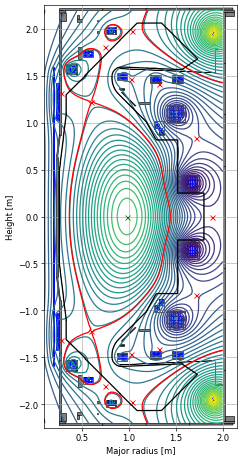

In [1]:
import os
import matplotlib.pyplot as plt
import freegs4e
import numpy as np

# build machine
from freegsnke import build_machine
tokamak = build_machine.tokamak(
    active_coils_path=f"../machine_configs/MAST-U/MAST-U_like_active_coils.pickle",
    passive_coils_path=f"../machine_configs/MAST-U/MAST-U_like_passive_coils.pickle",
    limiter_path=f"../machine_configs/MAST-U/MAST-U_like_limiter.pickle",
    wall_path=f"../machine_configs/MAST-U/MAST-U_like_wall.pickle",
)

# initialise equilibrium object
from freegsnke import equilibrium_update
eq = equilibrium_update.Equilibrium(
    tokamak=tokamak,
    Rmin=0.1, Rmax=2.0,   # radial range
    Zmin=-2.2, Zmax=2.2,  # vertical range
    nx=65,                # number of grid points in the radial direction (needs to be of the form (2**n + 1) with n being an integer)
    ny=129,               # number of grid points in the vertical direction (needs to be of the form (2**n + 1) with n being an integer)
    # psi=plasma_psi
)  

# initialise profile object
from freegsnke.jtor_update import ConstrainPaxisIp
profiles = ConstrainPaxisIp(
    eq=eq,
    paxis=8.1e3,
    Ip=6.2e5,
    fvac=0.5,
    alpha_m=1.8,
    alpha_n=1.2
)

# initialise solver
from freegsnke import GSstaticsolver
GSStaticSolver = GSstaticsolver.NKGSsolver(eq)    

# set coil currents (these were found using the virtual circuits example)
current_values = {'Solenoid': 5000.0,
 'PX': 4664.8264042905585,
 'D1': 4817.449859117131,
 'D2': 1234.1293690145924,
 'D3': 1369.133338804566,
 'Dp': -905.4445404924389,
 'D5': 3757.2659244120455,
 'D6': -675.5868544077532,
 'D7': -94.84095712236905,
 'P4': -3536.0809826602153,
 'P5': -4568.000388616427,
 'P6': 0.0005793038603228533,
}

for key in current_values.keys():
    eq.tokamak.set_coil_current(coil_label=key, current_value=current_values[key])

# carry out forward solve
GSStaticSolver.solve(eq=eq, 
                     profiles=profiles, 
                     constrain=None, 
                     target_relative_tolerance=1e-9)

# plot the resulting equilbrium
fig1, ax1 = plt.subplots(1, 1, figsize=(4, 8), dpi=60)
ax1.grid(True, which='both')
eq.plot(axis=ax1, show=False)
eq.tokamak.plot(axis=ax1, show=False)
ax1.set_xlim(0.1, 2.15)
ax1.set_ylim(-2.25, 2.25)
plt.tight_layout()

Solving the linearised system requires inititialising the `nl_solver` object. This requires the:
- equilibrium and profiles. 
- plasma resistivity (for the lumped plasma resistance calculation).
- some options regarding mode cut-off frequencies, minimum Jacobian column norms, etc (we will revist these later in the notebook).

Within this object, the Jacobians are calculated and the matrices are built. Depending on the number of active coils and passive structures present in the system, this can take a while (as a GS solve is required for each). Following this, the matrices of the linearised system can be calculated and the eigenvalues/vectors found.

Here we will be using **all** available metal modes, however, later on we will show how to exclude those (via additional options to `nl_solver`) with specific frequencies, timescales, coupling, etc to reduce computational runtime (without losing too much information).

In [2]:
from freegsnke import nonlinear_solve

nonlinear_solver = nonlinear_solve.nl_solver(
    eq=eq, 
    profiles=profiles, 
    plasma_resistivity=1e-6, # this defines the lumped plasma resistances alternatively you can calculate the growth rates without the plasma model)
    min_dIy_dI=1e-10,        # this has been set artificially low in this example
    max_mode_frequency=1e10  # this has been set artificially high in this example
)

-----
Checking that the provided 'eq' and 'profiles' are a GS solution...
Forward static solve SUCCESS. Tolerance 4.78e-10 (vs. requested 1.00e-08) reached in 0/100 iterations.
-----
Instantiating nonlinear solver objects...
done.
-----
Identifying mode selection criteria...
      'threshold_dIy_dI', 'min_dIy_dI', and 'max_mode_frequency' options selected --> passive structure modes are selected according to these thresholds.
-----
Initial mode selection:
   Active coils
      total selected = 12 (out of 12)
   Passive structures
      138 selected with characteristic frequency less than 'max_mode_frequency'
      0 selected that couple with the plasma more than 'threshold_dIy_dI'
      0 removed that couple with the plasma less than 'min_dIy_dI'
      total selected = 138 (out of 138)
   Total number of modes = 150 (12 active coils + 138 passive structures)
      (Note: some additional modes may be removed after Jacobian calculation)
-----
Building the 3051 x 151 Jacobian (dIy/dI) of 

From the printout we can see the steps being taken.

Important to look out for are the 'Initial mode selection' and 'Further mode reduction' sections that tell you which modes have been included in the analysis. Note again that the "final" mode (after including the actives and passives) comes from the plasma current equation. The number of modes can be adjusted with different options that we will see later. 

The 'Stability parameters' section shows a number of different metrics used to gauge plasma vertical instability. In 'Deformable plasma metrics' we have the growth rate of the unstable mode and the associated timescale (i.e. 1/(growth_rate)). In the 'Rigid plasma metrics' section, we return a number of commonly used parameters that do not make use of the Jacobian matrix (we will discuss these later too). 

### Extracting data and visualising

Next, we will show to access some of the calculated data and how to visualise a few things. 

In [3]:
# accessing the number of modes
print(f"Total number of modes excl. plasma current = {nonlinear_solver.n_metal_modes}")   # total (actives + passives)
print(f"Total number of active coils = {nonlinear_solver.n_active_coils}")   # actives
print(f"Total number of passive structures = {nonlinear_solver.n_passive_coils}")   # passives

Total number of modes excl. plasma current = 150
Total number of active coils = 12
Total number of passive structures = 138


In [4]:
# accessing the growth rates (via the timescales)
timescales = nonlinear_solver.linearised_sol.all_timescales # all eigenvalues: timescales (descending order)
growth_rates = 1/timescales                                 # growth rates are simply 1/timescales (descending order)
modes = nonlinear_solver.linearised_sol.all_modes           # all eigenvectors (columns in same order as e'values)

In [5]:
# extracting the unstable mode(s) - typically only one
mask = (timescales > 0)
idx = np.where(mask)[0][0] # index of unstable mode
unstable_timescales = timescales[mask]
unstable_modes = np.squeeze(modes[:,mask])

We can visualise the poloidal flux produced by the unstable mode using the following code. We can also do this for other (stable) modes if required.

Mode 20 ---> unstable
Growth rate = 2.78e+02 [1/s]
Timescale = 3.60e-03 [s]


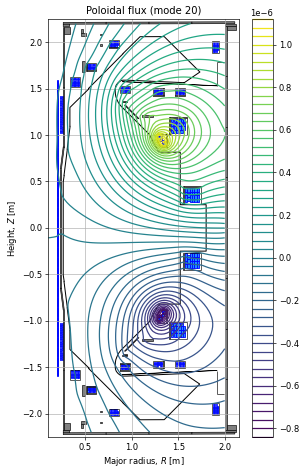

In [6]:
# mode number (choose which one you want to visualise)
i = idx # default is unstable mode
mode_currents = np.real(modes[:,i])

# the associated instability timescale and growth rate
print(f"Mode {i} ---> {'stable' if np.real(timescales[i]) < 0 else 'unstable'}")
print(f"Growth rate = {np.real(growth_rates[i]):.2e} [1/s]")
print(f"Timescale = {np.real(timescales[i]):.2e} [s]")

# multiply each metal current (from the eigenvector) with its corresponding Greens matrix and sum
# (don't forget to omit the plasma current mode, i.e. the final element)
flux = np.sum(mode_currents[0:-1, np.newaxis, np.newaxis] * nonlinear_solver.vessel_modes_greens, axis=0)

# plot
fig, ax = plt.subplots(1, 1, figsize=(5, 8), dpi=60)
ax.grid(True, which='both')
ax.set_aspect('equal')
ax.set_xlim(0.1, 2.15)
ax.set_ylim(-2.25, 2.25)
ax.set_title(f"Poloidal flux (mode {i})")
ax.set_xlabel(r'Major radius, $R$ [m]')
ax.set_ylabel(r'Height, $Z$ [m]')
plt.tight_layout()

eq.tokamak.plot(axis=ax,show=False)
ax.plot(eq.tokamak.wall.R, eq.tokamak.wall.Z, color='k', linewidth=1.2, linestyle="-")
im = ax.contour(eq.R, eq.Z, flux, levels=50)                        
cbar = plt.colorbar(im, ax=ax, fraction=0.09)

Next, we can extract two different plasma current density $J_{p}(\psi, R,Z)$ maps: call them $J_{p}^{deform}$ and $J_{p}^{rigid}$.

The first corresponds to an application of the unstable mode currents to the equilbirium, solving the GS equation, and observing the "deformable" movement of the plasma core (it shifts in $(R,Z)$ and also it's boundary will displace). This results in a new current density map $J_{p}^{deform}$. 

The second corresponds to taking the $(R,Z)$ shifts in the current centres (from $J_{p}^{deform}$) and shifting the $J_p$ map from the orginal equilibrium. In this case we observe a "rigid" displacement of the plasma current density: $J_{p}^{rigid}$. 

While they do not look significantly different in the case presented here, they will when studying more vertically unstable plasmas.


Rate of change of Rcurrent wrt unstable mode = 2.27e-06 [m].
Rate of change of Zcurrent wrt unstable mode = 1.30e-05 [m].


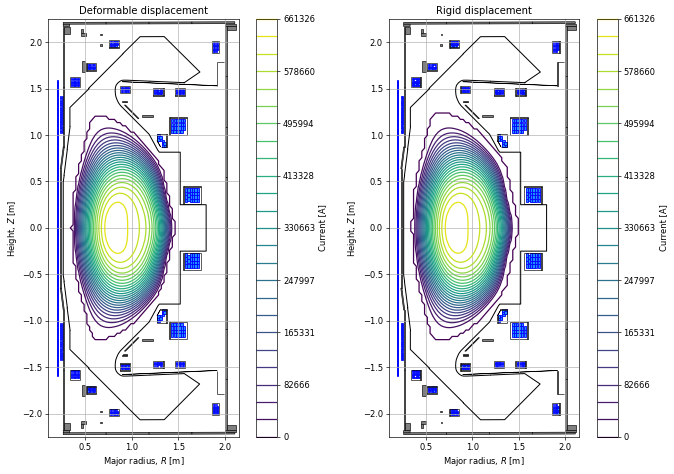

In [7]:
# data
jtor_maps = nonlinear_solver.deformable_vs_rigid_jtor  

# rate of change of R and Z current centre of plasma wrt to the unstable mode only
dRZd_unstable_mode = nonlinear_solver.dRZd_unstable_mode
print(f"Rate of change of Rcurrent wrt unstable mode = {dRZd_unstable_mode[0]:.2e} [m].")
print(f"Rate of change of Zcurrent wrt unstable mode = {dRZd_unstable_mode[1]:.2e} [m].")

# plot

min_lev = min(np.min(jtor_maps[0]),np.min(jtor_maps[1]))
max_lev = max(np.max(jtor_maps[0]),np.max(jtor_maps[1]))
levels = np.linspace(min_lev, max_lev, 25)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8), dpi=60)

ax1.grid(True, which='both')
ax1.set_aspect('equal')
ax1.set_xlim(0.1, 2.15)
ax1.set_ylim(-2.25, 2.25)
ax1.set_title(f"Deformable displacement")
ax1.set_xlabel(r'Major radius, $R$ [m]')
ax1.set_ylabel(r'Height, $Z$ [m]')
plt.tight_layout()

eq.tokamak.plot(axis=ax1,show=False)
ax1.plot(eq.tokamak.wall.R, eq.tokamak.wall.Z, color='k', linewidth=1.2, linestyle="-")
im1 = ax1.contour(eq.R, eq.Z, jtor_maps[0], levels=levels)                        
cbar = plt.colorbar(im1, ax=ax1, fraction=0.09)
cbar.set_label('Current [A]')


ax2.grid(True, which='both')
ax2.set_aspect('equal')
ax2.set_xlim(0.1, 2.15)
ax2.set_ylim(-2.25, 2.25)
ax2.set_title(f"Rigid displacement")
ax2.set_xlabel(r'Major radius, $R$ [m]')
ax2.set_ylabel(r'Height, $Z$ [m]')

eq.tokamak.plot(axis=ax2,show=False)
ax2.plot(eq.tokamak.wall.R, eq.tokamak.wall.Z, color='k', linewidth=1.2, linestyle="-")
im2 = ax2.contour(eq.R, eq.Z, jtor_maps[1], levels=levels)                        
cbar = plt.colorbar(im2, ax=ax2, fraction=0.09)
cbar.set_label('Current [A]')


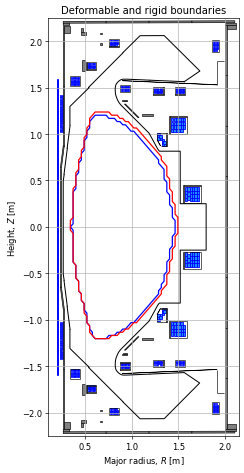

In [8]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8), dpi=60)

ax1.grid(True, which='both')
ax1.set_aspect('equal')
ax1.set_xlim(0.1, 2.15)
ax1.set_ylim(-2.25, 2.25)
ax1.set_title(f"Deformable and rigid boundaries")
ax1.set_xlabel(r'Major radius, $R$ [m]')
ax1.set_ylabel(r'Height, $Z$ [m]')
plt.tight_layout()

eq.tokamak.plot(axis=ax1,show=False)
ax1.plot(eq.tokamak.wall.R, eq.tokamak.wall.Z, color='k', linewidth=1.2, linestyle="-")
ax1.contour(eq.R, eq.Z, jtor_maps[0], levels=[0], colors='b')        
ax1.contour(eq.R, eq.Z, jtor_maps[1], levels=[0], colors='r')  


In the next plot, we show how to visualise the derivative of the plasma current density with respect to the metal currents (i.e. visualise the finite difference calculated Jacobian).

As before, just choose a mode number and plot.

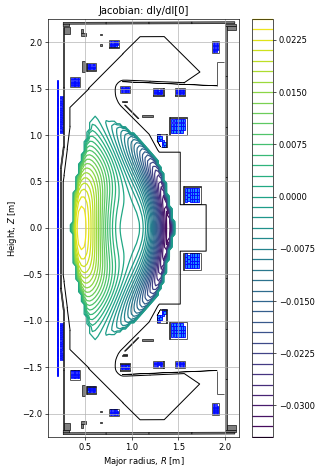

In [9]:
# extract the Jacobian (no. plasma current points x no. modes) 
# i.e. the full finite-difference Jacobian of plasma current density points wrt metal currents 
dIydI = nonlinear_solver.dIydI       

# choose the mode number you want to plot
i = 0

# extracts the column of the Jacobian and places into the correct grid for plotting
derivs = np.full(nonlinear_solver.limiter_handler.mask_inside_limiter.shape, np.nan)
derivs[nonlinear_solver.limiter_handler.mask_inside_limiter] = dIydI[:,i]

# plot
fig, ax = plt.subplots(1, 1, figsize=(5, 8), dpi=60)
ax.grid(True, which='both')
ax.set_aspect('equal')
ax.set_xlim(0.1, 2.15)
ax.set_ylim(-2.25, 2.25)
ax.set_title(f"Jacobian: dIy/dI[{i}]")
ax.set_xlabel(r'Major radius, $R$ [m]')
ax.set_ylabel(r'Height, $Z$ [m]')
plt.tight_layout()

eq.tokamak.plot(axis=ax,show=False)
ax.plot(eq.tokamak.wall.R, eq.tokamak.wall.Z, color='k', linewidth=1.2, linestyle="-")
im = ax.contour(eq.R, eq.Z, derivs, levels=50)                        
cbar = plt.colorbar(im, ax=ax, fraction=0.09)


### Stability parameters

We now return to the 'Stability parameters' that were returned when we instantiated the `nl_solver` object. In addition to the deformable growth rate, we can extract other commonly used stability metrics (that assume a rigid, non-deformable plasma).

#### Leuer parameter

The first is the stability parameter outlined in equation (6) of [Leuer (1989)](https://www.tandfonline.com/doi/abs/10.13182/FST89-A39747). See the reference for more details on its interpretation.

The (generalised) Leuer stability parameter is defined as the ratio of stabilising force gradient to de-stabilising force gradient acting on the system:

\begin{equation}
    f := \frac{f_{stab}}{f_{destab}} = \frac{\bold{I}_y^T M'_{y,m} M^{-1}_{m,m} M'_{m,y} \bold{I}_y}{\bold{I}_y^T M''_{y,m} \bold{I}_m},
\end{equation}

where $M'$ denotes the derivative (and second derivative $M''$) of the mutual inductances with respect to the $Z$ coordinate. Other matrices are as they are defined above. We can find these derivatives using the relations:

\begin{align}
    \frac{d}{dZ} M_{y,m} = \frac{d}{dZ} M (R_y, Z_y ; R_m, Z_m) &= \frac{d}{dZ} 2 \pi G (R_y, Z_y ; R_m, Z_m) \\
    &= \frac{d}{dZ} 2 \pi \psi (R_y, Z_y ; R_m, Z_m) \\
    &= - 2 \pi R_m B_R (R_y, Z_y ; R_m, Z_m). 
\end{align}

Here, $G$ is the Greens function between the plasma locations and the metal locations (which is equal to the poloidal flux $\psi_{y,m}$ at the metal locations produced by a unit current at the plasma locations). We can then use the relation $B_R = - (d \psi / dZ) / R$, where $B_R$ is the radial magnetic field. Note the actual calculation of this is slightly more involed when the metals are defined using filaments (see source code in nonlinear_solve.py).

The second derivative is the same except we need $d B_R/ dZ$ instead of $B_R$. 

This stability parameter can be calculated in different ways by choosing which metals ($m$) to include in the calculation. Note, however, that no mode decomposition (see below) is performed when calculating these metrics. 

Note, however, in this particular equilibrium the metrics look very similar because there are no currents in the passive structures!

In [10]:
print(f"Stabilisation force gradient (from all metals) = {nonlinear_solver.all_coils_stab_force}")
print(f"Stabilisation force gradient (from active coils) = {nonlinear_solver.actives_stab_force}")
print(f"Stabilisation force gradient (from passive coils) = {nonlinear_solver.passives_stab_force}")
print("---")
print(f"De-stabilisation force gradient (from all metals) = {nonlinear_solver.all_coils_destab_force}")
print(f"De-tabilisation force gradient (from active coils) = {nonlinear_solver.actives_destab_force}")
print(f"De-tabilisation force gradient (from passive coils) = {nonlinear_solver.passives_destab_force}")
print("---")
print(f"Leuer parameter (passives over actives) = {nonlinear_solver.passives_stab_force/nonlinear_solver.actives_destab_force}")
print(f"Leuer parameter (all metals over actives) = {nonlinear_solver.all_coils_stab_force/nonlinear_solver.actives_destab_force}")
print(f"Leuer parameter (all metals over all metals) = {nonlinear_solver.all_coils_stab_force/nonlinear_solver.all_coils_destab_force}")

Stabilisation force gradient (from all metals) = 153202.78384769688
Stabilisation force gradient (from active coils) = 88017.72509664345
Stabilisation force gradient (from passive coils) = 153201.45996709002
---
De-stabilisation force gradient (from all metals) = 104708.18928764414
De-tabilisation force gradient (from active coils) = 104708.18928764414
De-tabilisation force gradient (from passive coils) = 0.0
---
Leuer parameter (passives over actives) = 1.4631277745261155
Leuer parameter (all metals over actives) = 1.4631404180510954
Leuer parameter (all metals over all metals) = 1.4631404180510954


#### Portone parameter (need to check/fix)


The second is the stability parameter defined by [Portone (2005)](https://iopscience.iop.org/article/10.1088/0029-5515/45/8/021).

#### what is it, what it measn, how its defined?

The (inductive) stability margins are found by solving for the eigenvalues of:

$$ A := - M_{m,m}^{-1} M_{m,y} \frac{\partial \bold{I}_y}{\partial \bold{I}_m} \Bigg|_{GS} - \bold{I}, $$

where $\bold{I}$ is the identity matrix. We say "inductive" because no resistance terms are present in this metric.

The positive eigenvalue corresponds to the unstable inductive stability margin. 

It measures what?

In [11]:
# section on the stability margin
# nonlinear_solver.linearised_sol.all_stability_margins # all calculated stability margins 

In [12]:
# extract the L and S matrices
n = nonlinear_solver.linearised_sol.n_independent_vars
L = nonlinear_solver.linearised_sol.M0matrix[0:n, 0:n]
S = -nonlinear_solver.linearised_sol.dMmatrix[0:n, 0:n]

# find e'values
A = np.linalg.solve(L, S) - np.eye(n)
np.sort(np.linalg.eigvals(A),)



# extract the L and S matrices
n = nonlinear_solver.linearised_sol.n_independent_vars
L = nonlinear_solver.linearised_sol.M0matrix[0:n, 0:n]
Ls = nonlinear_solver.linearised_sol.dMmatrix[0:n, 0:n]

LL = L + Ls

# find e'values
A = -np.linalg.inv(L)*LL
np.sort(np.linalg.eigvals(A))


# # extract stability margin
# mask = self.all_stability_margins > 0
# self.stability_margin = self.all_stability_margins[
#     mask
# ]  # the positive (i.e. unstable) eigenvalues

array([-1.82183296e+01+0.j        , -1.10407263e+01+0.j        ,
       -1.01281086e+01+0.j        , -9.24655483e+00+0.j        ,
       -8.23465916e+00+0.j        , -7.25064832e+00-0.12237966j,
       -7.25064832e+00+0.12237966j, -6.45408479e+00+0.j        ,
       -5.63563266e+00+0.j        , -4.97973974e+00+0.j        ,
       -4.26968293e+00-0.04188855j, -4.26968293e+00+0.04188855j,
       -2.80146151e+00+0.j        , -2.54145042e+00+0.j        ,
       -2.19088663e+00+0.j        , -1.89442305e+00+0.j        ,
       -1.79035218e+00+0.j        , -1.59135149e+00+0.j        ,
       -1.50204530e+00-0.04678533j, -1.50204530e+00+0.04678533j,
       -1.40081797e+00-0.28649219j, -1.40081797e+00+0.28649219j,
       -1.35014514e+00+0.j        , -1.19595680e+00+0.j        ,
       -1.14572319e+00+0.j        , -1.13656069e+00+0.j        ,
       -1.05119673e+00-0.01966613j, -1.05119673e+00+0.01966613j,
       -1.04148281e+00+0.j        , -1.01248249e+00+0.j        ,
       -9.95624221e-01+0.

### Back to the deformable model: Removing the plasma equation

The deformable growth rates can also be computed in the case where we assume $\bold{\dot{I}}_p = 0$. For this, the final row/column of the matrices are omitted.

This may be useful, for example, if you do not have a good intuition for what the `plasma_resistivity` parameter (in the `nl_solver` object) is. Recall that this goes into the "lumped" plasma equation and therefore the state space matrices when calculating the growth rates. 

To extract these timescales and modes, simply call the following:

In [13]:
# accessing the growth rates (via the timescales)
timescales_const_Ip = nonlinear_solver.linearised_sol.all_timescales_const_Ip # all eigenvalues: timescales (descending order) without plasma equation
growth_rates_const_Ip = 1/timescales_const_Ip                                 # all eigenvalues: growth rates (descending order) without plasma equation
modes_const_Ip = nonlinear_solver.linearised_sol.all_modes_const_Ip           # all eigenvectors (columns in same order as e'values) without plasma equation

### Mode decomposition

The initial calculation of the growth rates was quite lengthy because we included all of the passive structures (each of which then require a GS solve to calculate the Jacobian matrix). 

We can in fact carry out mode decomposiiton, i.e. exclude a number of (passive structure) modes that couple weakly to the plasma, and save some compute time. Once a subset of the original passive structures modes has been selected, FreeGSNKE performs mode decomposition and solves for the eigenvalues/vectors as outlined in the [Appendix 2 of Amorisco et al. (2024)](https://pubs.aip.org/aip/pop/article/31/4/042517/3286904/FreeGSNKE-A-Python-based-dynamic-free-boundary).

There are, however, a number of different ways to choose this subset of passive structure modes. Once one is chosen, the same analysis above can be carried out as before using the eigenvalues/modes.

#### Option 1: Fixing the number of passive structure modes explicity

While the active coils will always be included as modes, you can set the number of passive structure modes directly via the `fix_n_vessel_modes` option (choose a number between 0 and the number of passive structures in the tokamak object).

The process by which the passive modes are chosen is as follows:
1. A first "estimate" of
   $$
   \lambda_i = \left\| \left( \frac{\partial \mathbf{I}_y}{\partial \mathbf{I}_m} \right)_{:,i} \right\|,
   $$
   is calculated for all passive structure modes (without fully solving the GS equation and calculating the true Jacobian). This is done by perturbing the currents in the modes (passive coils), updating the poloidal flux produced by these currents, and then evaluating the plasma current density $J_p(R,Z, \psi)$ to obtain the perturbed $\mathbf{I}_y$. Here, $\psi$ is the total poloidal flux, i.e. the plasma and the metals contributions combined.

2. The $\lambda_i$ are then sorted into ascending order and with $\hat{\lambda} = \max_i \{ \lambda_i\}$ being the largest (strongest coupling).

3. The top (strongest coupled) `fix_n_vessel_modes` are then selected for inclusion in the mode decomposition. 

As a rough rule of thumb, the more modes that are added, the larger the timescale of the unstable mode is expected to be (i.e. a smaller growth rate). Though this rule is not thought to be strict.

In [14]:
# instantiate the nl_solver object with fixed mode
nonlinear_solver_option_1 = nonlinear_solve.nl_solver(
    eq=eq, 
    profiles=profiles, 
    plasma_resistivity=1e-6,
    fix_n_vessel_modes=50,
)

-----
Checking that the provided 'eq' and 'profiles' are a GS solution...


Forward static solve SUCCESS. Tolerance 4.78e-10 (vs. requested 1.00e-08) reached in 0/100 iterations.
-----
Instantiating nonlinear solver objects...
done.
-----
Identifying mode selection criteria...
      'fix_n_vessel_modes' option selected --> passive structure modes that couple most to the strongest passive structure mode are being selected.
-----
Initial mode selection:
   Active coils
      total selected = 12 (out of 12)
   Passive structures
      50 selected using 'fix_n_vessel_modes'
   Total number of modes = 62 (12 active coils + 50 passive structures)
      (Note: some additional modes may be removed after Jacobian calculation if 'mode_removal=True')
-----
Building the 3051 x 63 Jacobian (dIy/dI) of plasma current density (inside the LCFS) with respect to all metal currents and the total plasma current.
done.
-----
Stability paramters:
   Deformable plasma metrics:
      Growth rate = [ 372.60707699+0.j 9722.78000236+0.j] [1/s]
      Instability timescale = [0.00268379-0

Note that in this case we have two unstable modes.

We can plot how these look using similar code as before, except we need to remember that now we've done a mode decomposition, the eigenmodes need to be transformed back into the original metal currents. This is done in the plotting cell below. 

**QUESTION: ARE WE SURE THE SECOND UNSTABLE MODES IS SPURIOUS?**

In [15]:
# accessing the growth rates (via the timescales)
timescales = nonlinear_solver_option_1.linearised_sol.all_timescales # all eigenvalues: timescales (descending order)
growth_rates = 1/timescales                                             # growth rates are simply 1/timescales (descending order)
modes = nonlinear_solver_option_1.linearised_sol.all_modes           # all eigenvectors (columns in same order as e'values)

In [16]:
# extracting the unstable mode(s)
mask = (timescales > 0)
idx = np.where(mask)[0] # index of unstable mode(s)
unstable_timescales = timescales[mask]
unstable_modes = np.squeeze(modes[:,mask])

Mode 22 ---> unstable
Growth rate = 3.73e+02 [1/s]
Timescale = 2.68e-03 [s]


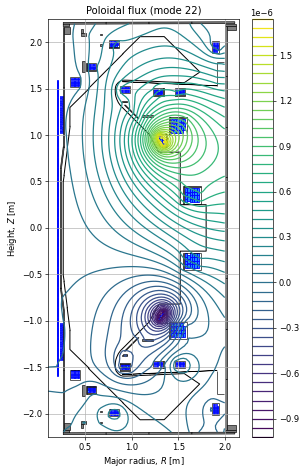

In [17]:
# mode number (choose which one you want to visualise)
i = idx[0]   # unstable modes
# i = 0 to 62 (all modes)

# this function transforms the (decomposed) mode currents back to regular metal currents
# (don't forget to omit the plasma current mode, i.e. the final element)
mode_currents = nonlinear_solver_option_1.evol_metal_curr.IdtoIvessel(np.real(modes[0:-1,i]))

# the associated instability timescale and growth rate
print(f"Mode {i} ---> {'stable' if np.real(timescales[i]) < 0 else 'unstable'}")
print(f"Growth rate = {np.real(growth_rates[i]):.2e} [1/s]")
print(f"Timescale = {np.real(timescales[i]):.2e} [s]")

# multiply each metal current (from the eigenvector) with its corresponding Greens matrix and sum
flux = np.sum(mode_currents[:, np.newaxis, np.newaxis] * nonlinear_solver_option_1.vessel_modes_greens, axis=0)

# plot
fig, ax = plt.subplots(1, 1, figsize=(5, 8), dpi=60)
ax.grid(True, which='both')
ax.set_aspect('equal')
ax.set_xlim(0.1, 2.15)
ax.set_ylim(-2.25, 2.25)
ax.set_title(f"Poloidal flux (mode {i})")
ax.set_xlabel(r'Major radius, $R$ [m]')
ax.set_ylabel(r'Height, $Z$ [m]')
plt.tight_layout()

eq.tokamak.plot(axis=ax,show=False)
ax.plot(eq.tokamak.wall.R, eq.tokamak.wall.Z, color='k', linewidth=1.2, linestyle="-")
im = ax.contour(eq.R, eq.Z, flux, levels=50)                        
cbar = plt.colorbar(im, ax=ax, fraction=0.09)

#### Option 2: Choosing modes based on coupling and mode frequency

Alternatively, one can be more precise and select modes based on how well they couple to the "strongest" mode (via `min_dIy_dI` and `threshold_dIy_dI`) and whether they are below some maximum mode frequency (via `max_mode_frequency`). To explain how this works, we define these parameters as follows: 
- $\alpha=$ `min_dIy_dI` $\in [0,1]$.
- $\beta=$`threshold_dIy_dI` $\in [0,1]$ (note that $\alpha \leq \beta$).
- $\omega=$`max_mode_frequency` $\geq 0$.

The approximate process to select the modes is as follows:

1. Order the eigenvalues (characteristic frequencies) of  
   $$
   R_{m,m}^{1/2} M_{m,m}^{-1} R_{m,m}^{1/2},
   $$  
   in ascending order and flag any above $\omega$ for removal. Here $R$ and $M$ are the resistance and inductance matrices for the passive structure metals only.

2. As in option 1, calculate a first estimate of  
   $$
   \lambda_i = \left\| \left( \frac{\partial \mathbf{I}_y}{\partial \mathbf{I}_m} \right)_{:,i} \right\|
   $$  
   for all passive structure modes without fully solving the GS equation for each (this is done for flagged modes too). This is prior to the full Jacobian calculation later on.

3. Define the "strongest" coupled passive structure mode as $\hat{\lambda} = \max_i \{ \lambda_i\}$ and then keep any modes where
   $$
   \beta \hat{\lambda} \leq \lambda_i,
   $$
   even if they had previously been flagged for removal. 

4. Remove any modes where
   $$
   \lambda_i \leq \alpha \hat{\lambda},
   $$
   regardless of whether they were flagged or not.

5. Any remaining modes that had been flagged and not yet removed or kept are then removed.

6. For the remaining modes, the "true" finite-difference Jacobian is calculated and if `mode_removal=True`, any extra modes with their "true" $\lambda_i \leq \alpha \hat{\lambda}$ are also removed. 

These selected modes are then used in the mode decomposition. 

The following diagram should further explain which modes are removed in the coupling-frequency space. 

![Mode selection diagram](data/mode_selection.jpg)


An example of how to do this follows. The print out tells you which modes are selected and which are removed at each stage of the process.

In [18]:
# instantiate the nl_solver object with option 2 parameters
nonlinear_solver_option_2 = nonlinear_solve.nl_solver(
    eq=eq, 
    profiles=profiles, 
    min_dIy_dI=0.3,        
    threshold_dIy_dI=0.5,
    max_mode_frequency=1e3, 
)

-----
Checking that the provided 'eq' and 'profiles' are a GS solution...
Forward static solve SUCCESS. Tolerance 4.78e-10 (vs. requested 1.00e-08) reached in 0/100 iterations.
-----
Instantiating nonlinear solver objects...
done.
-----
Identifying mode selection criteria...
      'threshold_dIy_dI', 'min_dIy_dI', and 'max_mode_frequency' options selected --> passive structure modes are selected according to these thresholds.
-----
Initial mode selection:
   Active coils
      total selected = 12 (out of 12)
   Passive structures
      38 selected with characteristic frequency less than 'max_mode_frequency'
      3 selected that couple with the plasma more than 'threshold_dIy_dI'
      27 removed that couple with the plasma less than 'min_dIy_dI'
      total selected = 14 (out of 138)
   Total number of modes = 26 (12 active coils + 14 passive structures)
      (Note: some additional modes may be removed after Jacobian calculation)
-----
Building the 3051 x 27 Jacobian (dIy/dI) of plas

Notice in this particular case, no unstable modes were found and so either the plasma is **stable** (which means what?) or it is **Alfven unstable** (which means what?). 

**QUESTION: CAN WE EXPLAIN MORE WHAT A STABLE AND ALFVEN UNSTABLE PLASMA IS?**

### Other useful optional parameters

There are a number of additional optional parameters that can be selected when initialising the `nl_solver` object:
- The user can choose to specify custom metal resistances (vector) and inductances (matrix) via `custom_coil_resist` and `custom_self_ind` (just ensure dimensions match the number of active and passive coils you have). 
- If you already calculated the Jacobian dIy_dI in a previous instatiation of the object, you can provide it via `dIydI` to save calculating it again. 
- The timestep for evolutive simulations can be set via `full_timestep` and the internal timesteps within this full one can be set with `max_internal_timestep`. If, however, `automatic_timestep` is set (as a tuple of two floats), these values are overwritten such that `full_timestep` will equal automatic_timestep[0]*unstable_mode_timescale and `max_internal_timestep` will equal automatic_timestep[1]*unstable_mode_timescale.
- By setting `force_core_mask_linearization` to True, you can ensure that the finite difference calculations for the Jacobian are based on plasmas that have the same core region as each other. This helps avoid numerical issues when solving for plasmas with a very thin current sheet at the plasma edge. 

### More advanced study: moving coils/passives

Often of interest is to observe what happens to the growrth rate parameters as you physically move an active coil or a passive structure. This can be useful for the design of new tokamaks. 

Here, we build a toy tokamak with three pairs of up-down symmetric active coils (P1 and P2 are connected in series, while P3 is connected in anti-series). Coils connected in anti-series are typically used for vertical control of the plasma. We will start by solving for an equilibrium and showing what it looks like. 

In [19]:
from freegsnke import nonlinear_solve

In [20]:
# define the active coils 
active_coils = {'P1': {'1': {'R': [0.7],
   'Z': [-0.8],
   'dR': 0.05,
   'dZ': 0.05,
   'resistivity': 1.55e-08,
   'polarity': 1.0,
   'multiplier': 1.0},
  '2': {'R': [0.7],
   'Z': [0.8],
   'dR': 0.05,
   'dZ': 0.05,
   'resistivity': 1.55e-08,
   'polarity': 1.0,
   'multiplier': 1.0}},
 'P2': {'1': {'R': [1.75],
   'Z': [-0.6],
   'dR': 0.05,
   'dZ': 0.05,
   'resistivity': 1.55e-08,
   'polarity': 1.0,
   'multiplier': 1.0},
  '2': {'R': [1.75],
   'Z': [0.6],
   'dR': 0.05,
   'dZ': 0.05,
   'resistivity': 1.55e-08,
   'polarity': 1.0,
   'multiplier': 1.0}},
 'P3': {'1': {'R': [1.5],
   'Z': [-0.5145],
   'dR': 0.05,
   'dZ': 0.05,
   'resistivity': 1.55e-08,
   'polarity': 1.0,
   'multiplier': 1.0},
  '2': {'R': [1.5],
   'Z': [0.5145],
   'dR': 0.05,
   'dZ': 0.05,
   'resistivity': 1.55e-08,
   'polarity': -1.0,
   'multiplier': 1.0}}}

# define a pair of symmetric passive structures (these will have limited effect on the plasma)
passives = []
passives.append({
    "R": [1.81,1.81,1.79,1.79],
    "Z": [0.51,0.49,0.49,0.51],
    "name": 'passive_lower_wall',
    "resistivity": 5.5e-7
})
passives.append({
    "R": [1.81,1.81,1.79,1.79],
    "Z": [-0.51,-0.49,-0.49,-0.51],
    "name": 'passive_upper_wall',
    "resistivity": 5.5e-7
})

# define a rectangular limiter to contain the plasma
limiter = [{'R': 0.5, 'Z': -1}, {'R': 0.5, 'Z': 1}, {'R': 2, 'Z': 1}, {'R': 2, 'Z': -1}, {'R': 0.5, 'Z': -1}]

Active coils --> built from user-provided data.
Passive structures --> built from user-provided data.
Limiter --> built from user-provided data.
Wall --> built from user-provided data.
Magnetic probes --> none provided.
Resistance (R) and inductance (M) matrices --> built using actives (and passives if present).
Tokamak built.


Forward static solve SUCCESS. Tolerance 8.39e-11 (vs. requested 1.00e-10) reached in 33/100 iterations.


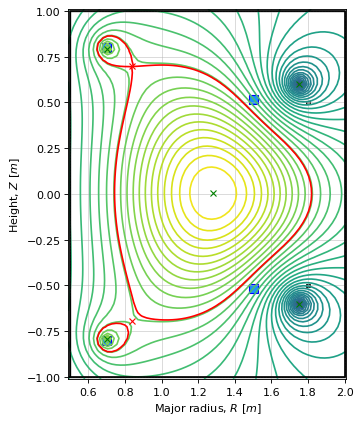

In [21]:
# build machine
tokamak_toy = build_machine.tokamak(
    active_coils_data=active_coils,
    passive_coils_data=passives,
    limiter_data=limiter,
    wall_data=limiter,
)

# build equilibrium object
eq_toy = equilibrium_update.Equilibrium(
    tokamak=tokamak_toy,
    Rmin=.49, Rmax=2.01,   # Radial range
    Zmin=-1.01, Zmax=1.01,  # Vertical range
    nx=65,   # Number of grid points in the radial direction
    ny=65,  # Number of grid points in the vertical direction
)

# initialise Jtor profile object (here we use the Lao profiles) 
from freegsnke.jtor_update import Lao85
profiles_toy = Lao85(
    eq=eq_toy,
    Ip=2e5,
    fvac=0.5,
    alpha=[58213.6],
    beta=[0.582136]
)

# assign some currents to coils 
eq_toy.tokamak.set_coil_current(coil_label="P1", current_value=58550)
eq_toy.tokamak.set_coil_current(coil_label="P2", current_value=-51640)
eq_toy.tokamak.set_coil_current(coil_label="P3", current_value=100)

# load static GS solver
GSStaticSolver_toy = GSstaticsolver.NKGSsolver(eq_toy)    

# solve for equilibrium
GSStaticSolver_toy.forward_solve(
    eq=eq_toy, 
    profiles=profiles_toy, 
    target_relative_tolerance=1e-10
    )

# plot equilibrium
fig1, ax1 = plt.subplots(1, 1, figsize=(6, 6), dpi=80)
ax1.grid(zorder=0, alpha=0.5)
eq_toy.plot(axis=ax1,show=False)
tokamak_toy.plot(axis=ax1, show=False)
ax1.fill(tokamak_toy.wall.R, tokamak_toy.wall.Z, color='k', linewidth=1.2, facecolor='w', zorder=0)
ax1.set_aspect('equal')
ax1.set_xlabel(r'Major radius, $R$ $[m]$')
ax1.set_ylabel(r'Height, $Z$ $[m]$')
plt.show()

We can see that we have a highly-deformed plasma sitting between (but close to) the vertical stability coils. We will now see what happens to the instability timescales (and the equilbiria themselves) when we move these coils vertically away from the plasma. 

In [22]:
from copy import deepcopy 

# storage lists
abs_P3_position = []
timescales = []
leuer = []
eqs = []

# do this for ten shifts in position
for i in range(0,10):

    # modify P3 coil Z position
    active_coils['P3']['1']['Z'][0] -= 0.075   # move down 7.5cm
    active_coils['P3']['2']['Z'][0] += 0.075   # move up 7.5cm

    # build machine
    tokamak_toy = build_machine.tokamak(
        active_coils_data=active_coils,
        passive_coils_data=passives,
        limiter_data=limiter,
        wall_data=limiter,
    )

    # build equilibrium object
    eq_toy = equilibrium_update.Equilibrium(
        tokamak=tokamak_toy,
        Rmin=.49, Rmax=2.01,   # Radial range
        Zmin=-1.01, Zmax=1.01,  # Vertical range
        nx=65,   # Number of grid points in the radial direction
        ny=65,  # Number of grid points in the vertical direction
    )

    # initialise Jtor profile object (here we use the Lao profiles) 
    profiles_toy = Lao85(
        eq=eq_toy,
        Ip=2e5,
        fvac=0.5,
        alpha=[58213.6],
        beta=[0.582136]
    )

    # assign currents to coils 
    eq_toy.tokamak.set_coil_current(coil_label="P1", current_value=58550)
    eq_toy.tokamak.set_coil_current(coil_label="P2", current_value=-51640)
    eq_toy.tokamak.set_coil_current(coil_label="P3", current_value=100)

    # load static GS solver
    GSStaticSolver_toy = GSstaticsolver.NKGSsolver(eq_toy)    

    # solve for equilibrium
    GSStaticSolver_toy.forward_solve(
        eq=eq_toy, 
        profiles=profiles_toy, 
        target_relative_tolerance=1e-10
        )

    # calculate the instability timescale 
    nonlinear_solver_toy = nonlinear_solve.nl_solver(
        eq=eq_toy, 
        profiles=profiles_toy,
        fix_n_vessel_modes=1,
    )

    # store data
    abs_P3_position.append(active_coils['P3']['2']['Z'][0])
    timescales.append(nonlinear_solver_toy.linearised_sol.all_timescales)
    leuer.append(nonlinear_solver_toy.linearised_sol.all_timescales)
    eqs.append(deepcopy(eq_toy))


Active coils --> built from user-provided data.
Passive structures --> built from user-provided data.
Limiter --> built from user-provided data.
Wall --> built from user-provided data.
Magnetic probes --> none provided.
Resistance (R) and inductance (M) matrices --> built using actives (and passives if present).
Tokamak built.
Forward static solve SUCCESS. Tolerance 5.89e-11 (vs. requested 1.00e-10) reached in 41/100 iterations.
-----
Checking that the provided 'eq' and 'profiles' are a GS solution...
Forward static solve SUCCESS. Tolerance 5.89e-11 (vs. requested 1.00e-08) reached in 0/100 iterations.
-----
Instantiating nonlinear solver objects...
done.
-----
Identifying mode selection criteria...
      'fix_n_vessel_modes' option selected --> passive structure modes that couple most to the strongest passive structure mode are being selected.
-----
Initial mode selection:
   Active coils
      total selected = 3 (out of 3)
   Passive structures
      1 selected using 'fix_n_vessel_mo

We now plot the largest timescales of the plasmas against the absolute vertical position of the P3 coil. We see that as the coils get further away from the plasma, it becomes increasingly unstable (recall that the growth rate is equal to 1/timescale) and eventually becomes Alfven unstable beyond 1.2m (see printout of max_timescales). 

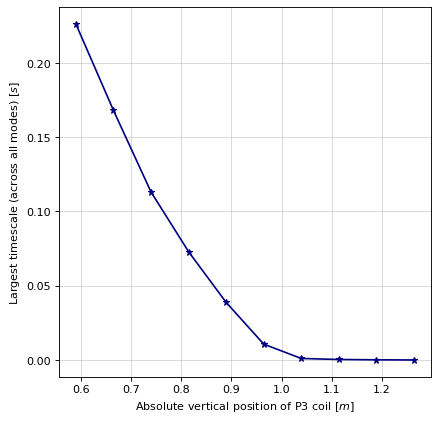

In [23]:
# plot largest timescales
max_timescales = [np.max(entry) for entry in timescales]

fig1, ax1 = plt.subplots(1, 1, figsize=(6, 6), dpi=80)
ax1.grid(zorder=0, alpha=0.5)
plt.plot(abs_P3_position, max_timescales, 'navy', marker='*')
# ax1.set_aspect('equal')
ax1.set_xlabel(r'Absolute vertical position of P3 coil $[m]$')
ax1.set_ylabel(r'Largest timescale (across all modes) $[s]$')
# ax1.set_yscale('log')
plt.show()

In [24]:
max_timescales

[0.2260657440553389,
 0.16793300286908855,
 0.11301536445758814,
 0.07282117222145197,
 0.03868376925402459,
 0.010616650900144896,
 0.0009854730547271316,
 0.00030728052789988353,
 7.756081638858297e-05,
 -2.7059438515426475e-05]

Here we plot a few of the equilibria as the coils are moved.

(-1.5, 1.5)

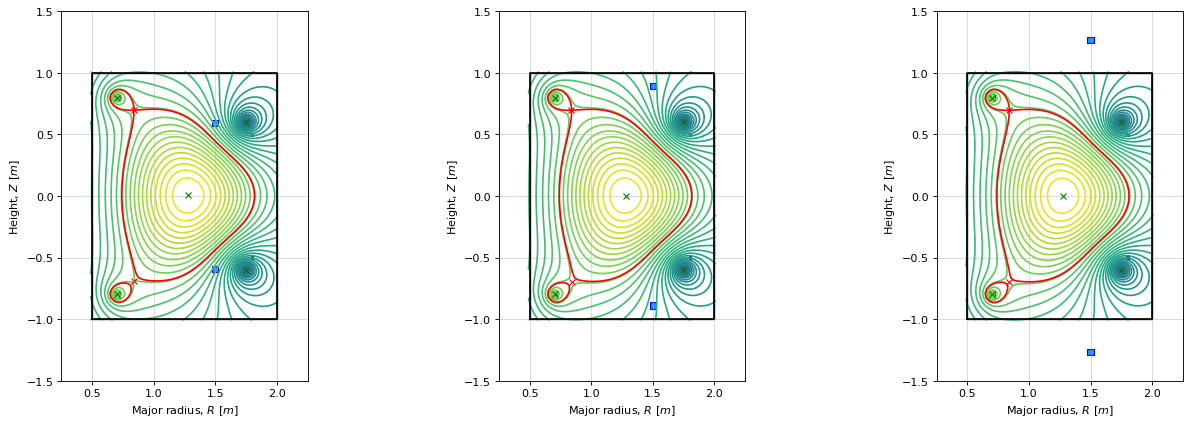

In [25]:
# which indices to plot
idx1 = 0
idx2 = 4
idx3 = 9

# plot equilbiria
fig1, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=80)

ax[0].grid(zorder=0, alpha=0.5)
eqs[idx1].plot(axis=ax[0],show=False)
eqs[idx1].tokamak.plot(axis=ax[0], show=False)
ax[0].fill(eqs[idx1].tokamak.wall.R, eqs[idx1].tokamak.wall.Z, color='k', linewidth=1.2, facecolor='w', zorder=0)
ax[0].set_aspect('equal')
ax[0].set_xlabel(r'Major radius, $R$ $[m]$')
ax[0].set_ylabel(r'Height, $Z$ $[m]$')
ax[0].set_xlim([0.25, 2.25])
ax[0].set_ylim([-1.5, 1.5])

ax[1].grid(zorder=0, alpha=0.5)
eqs[idx2].plot(axis=ax[1],show=False)
eqs[idx2].tokamak.plot(axis=ax[1], show=False)
ax[1].fill(eqs[idx2].tokamak.wall.R, eqs[idx2].tokamak.wall.Z, color='k', linewidth=1.2, facecolor='w', zorder=0)
ax[1].set_aspect('equal')
ax[1].set_xlabel(r'Major radius, $R$ $[m]$')
ax[1].set_ylabel(r'Height, $Z$ $[m]$')
ax[1].set_xlim([0.25, 2.25])
ax[1].set_ylim([-1.5, 1.5])

ax[2].grid(zorder=0, alpha=0.5)
eqs[idx3].plot(axis=ax[2],show=False)
eqs[idx3].tokamak.plot(axis=ax[2], show=False)
ax[2].fill(eqs[idx3].tokamak.wall.R, eqs[idx3].tokamak.wall.Z, color='k', linewidth=1.2, facecolor='w', zorder=0)
ax[2].set_aspect('equal')
ax[2].set_xlabel(r'Major radius, $R$ $[m]$')
ax[2].set_ylabel(r'Height, $Z$ $[m]$')
ax[2].set_xlim([0.25, 2.25])
ax[2].set_ylim([-1.5, 1.5])

One could repeat this exercise keeping the coil positions fixed but varying a coil current. 